In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres',
       'Last Updated'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Blitzer.de,MAPS_AND_NAVIGATION,4.5,65590,18M,5000000,Free,0.0,Everyone,Maps & Navigation,"July 9, 2018"
1,NBA LIVE Mobile Basketball,SPORTS,4.4,1690802,58M,50000000,Free,0.0,Everyone,Sports,"May 21, 2018"
2,Image 2 Wallpaper,TOOLS,4.3,81668,Varies with device,5000000,Free,0.0,Everyone,Tools,"December 26, 2016"
3,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,500000000,Free,0.0,Everyone,Communication,"July 18, 2018"
4,Block Puzzle Classic Legend !,GAME,4.2,17039,4.9M,5000000,Free,0.0,Everyone,Puzzle,"April 13, 2018"


In [8]:
#DATA VISUALIZATIONS

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rcParams
import os


Text(0.5, 1.0, 'TOTAL apps in each category')

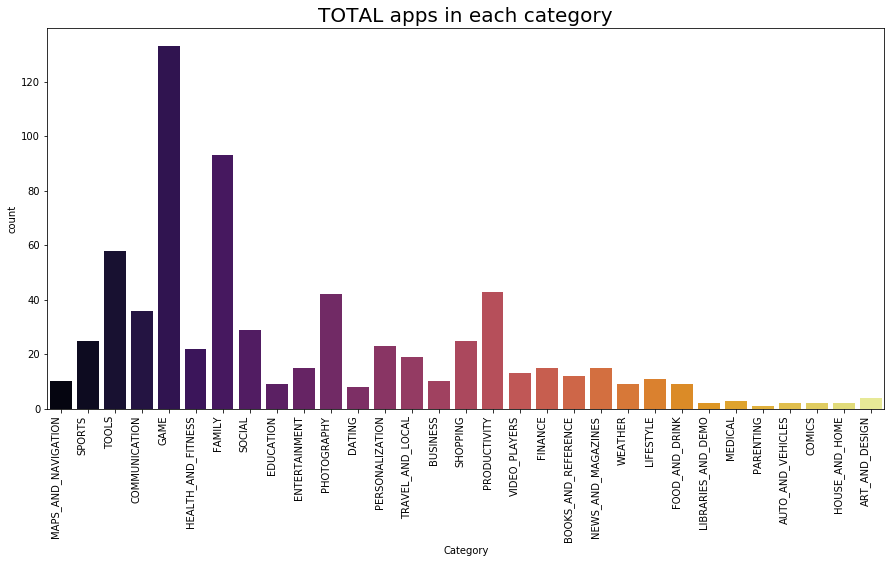

In [10]:


rcParams['figure.figsize'] = 15,7
category_plot = sns.countplot(x="Category",data=df, palette = "inferno")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
category_plot 
plt.title('TOTAL apps in each category',size = 20)
#Gaming has most number of apps

Text(0.5, 1.0, 'Content Rating distribution')

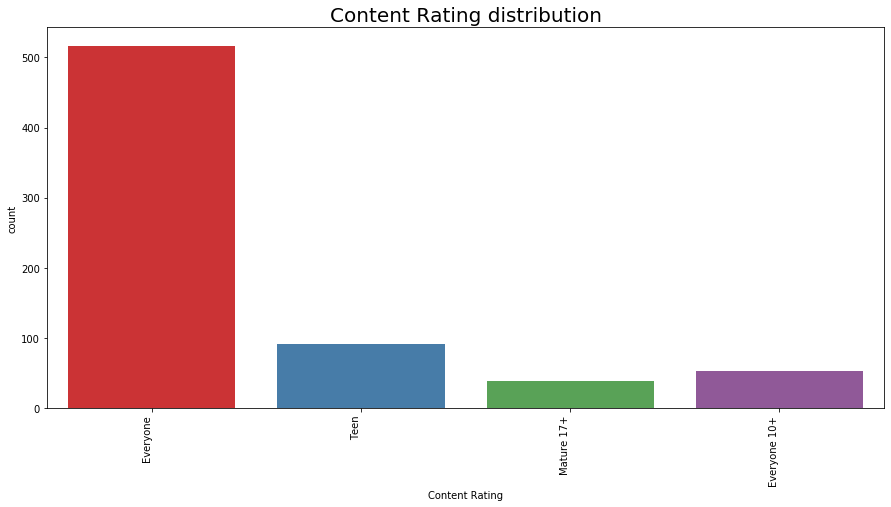

In [11]:
rcParams['figure.figsize'] = 15,7
content_plot = sns.countplot(x="Content Rating",data=df, palette = "Set1")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
content_plot 
plt.title('Content Rating distribution',size = 20)
#Most of the apps are dedicated to everyone and teen

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

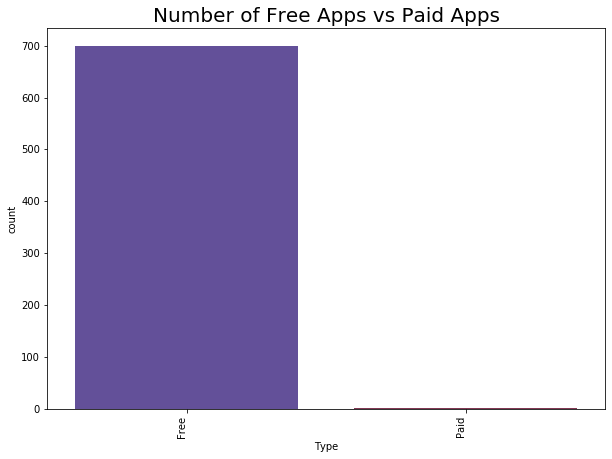

In [12]:
rcParams['figure.figsize'] = 10,7
type_plot = sns.countplot(x="Type", data=df, palette = "twilight")
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=90, ha="right")
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 20)
#most of the apps are free

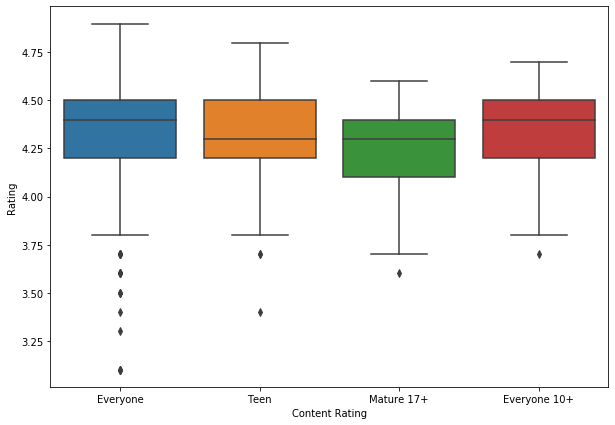

In [13]:
sns.boxplot(x='Content Rating', y='Rating', data=df)

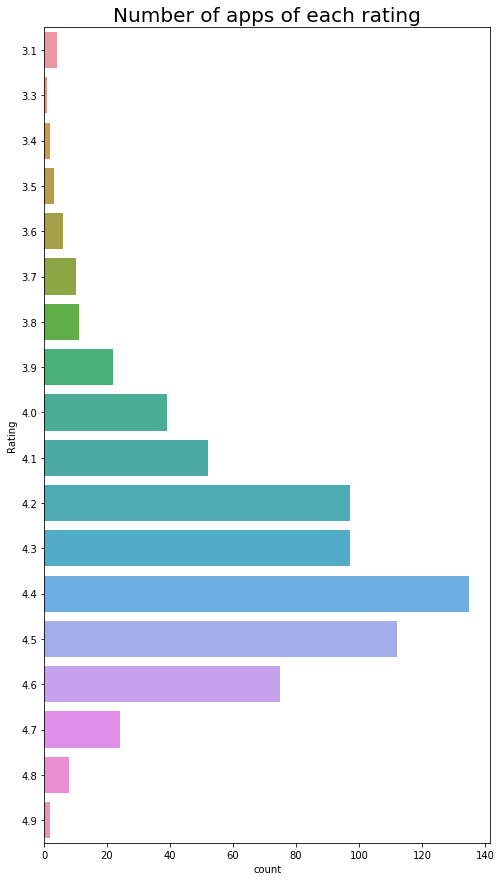

In [14]:
plt.figure(figsize=(8, 15))
sns.countplot(y='Rating',data=df )
plt.title('Number of apps of each rating',size=20)
plt.show()
#most of the apps have a rating of 4.4


In [15]:
#DEFINING A USER DEFINED FUNCTION
def barplotAnalysis(x,y):
    
    plt.figure(figsize=(10,8))
    plt.xticks(rotation=90)
    #plotting
    sns.barplot(x,y,palette="CMRmap")

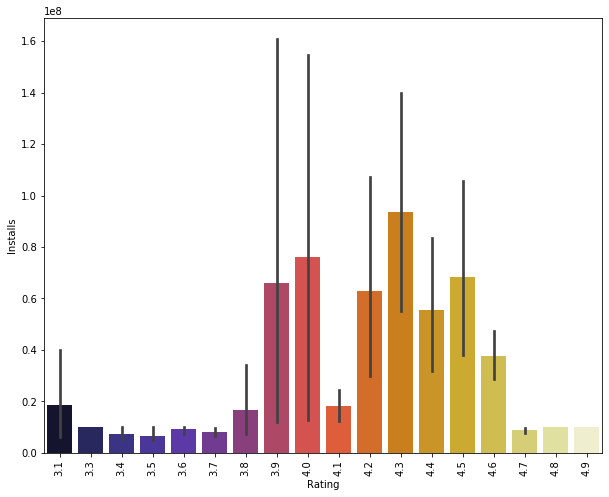

In [16]:
barplotAnalysis(df['Rating'],df['Installs'])

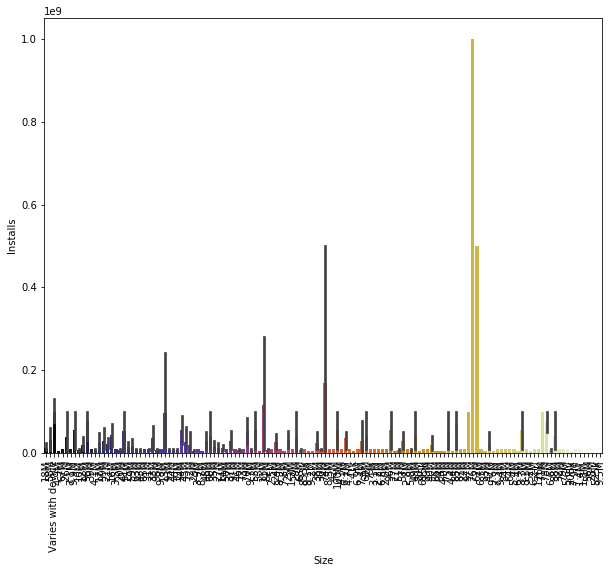

In [17]:
barplotAnalysis(df['Size'],df['Installs'])

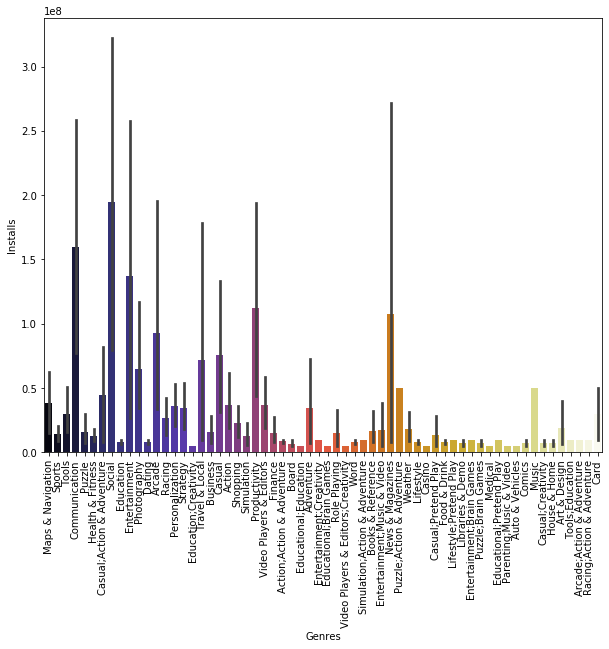

In [18]:
barplotAnalysis(df['Genres'],df['Installs'])

In [19]:
#does number of installs depend on rating

In [20]:
#NORMALIZTAION

In [21]:
df.shape

(700, 11)

In [22]:
df[df.duplicated()].shape

(93, 11)

In [23]:
df=df.drop_duplicates(subset='App')

In [24]:
df.shape

(564, 11)

In [25]:
df[df.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


In [26]:
df['Rating']=df['Rating'].fillna(value=round(df['Rating'].mean(),1))

In [27]:
df['Type']=df['Type'].fillna(method='ffill')

In [28]:
df[df.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


In [29]:
#Data Interpolation
count=0
for rating in df['Rating']:
    if(rating<1.0 or rating>5.0):
        count+=1
print(count)

0


In [30]:
from sklearn import preprocessing

In [31]:
cat_col=['App','Category','Size','Type','Content Rating','Genres', 'Last Updated']

In [32]:
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,61,17,4.5,65590,13,5000000,0,0.0,0,35,99
1,349,26,4.4,1690802,71,50000000,0,0.0,0,53,146
2,270,27,4.3,81668,134,5000000,0,0.0,0,55,36
3,506,5,4.3,11334799,134,500000000,0,0.0,0,17,75
4,64,12,4.2,17039,48,5000000,0,0.0,0,43,4


In [34]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [35]:
df['Type'].unique()

array([0, 1], dtype=int64)

In [36]:
df['Price'].unique()

array([0.  , 6.99])

In [37]:
col=df.columns[:6:].append(df.columns[8::])

In [38]:
df=(df-df.mean())/df.std() #Standardization of data

In [39]:
df.mean()

App              -1.200773e-17
Category          1.393684e-16
Rating           -8.373719e-15
Reviews           1.604312e-17
Size             -2.086589e-17
Installs         -3.001933e-16
Type             -9.023023e-17
Price            -1.190193e-16
Content Rating    2.007850e-17
Genres            1.330693e-16
Last Updated      1.763759e-16
dtype: float64

In [40]:
df.std()

App               1.0
Category          1.0
Rating            1.0
Reviews           1.0
Size              1.0
Installs          1.0
Type              1.0
Price             1.0
Content Rating    1.0
Genres            1.0
Last Updated      1.0
dtype: float64

In [41]:
df=(df-df.min())/(df.max()-df.min()) #Normalization of data

In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,0.108348,0.566667,0.777778,0.000951,0.097015,0.000000,0.0,0.0,0.0,0.573770,0.543956
1,0.619893,0.866667,0.722222,0.025362,0.529851,0.045226,0.0,0.0,0.0,0.868852,0.802198
2,0.479574,0.900000,0.666667,0.001192,1.000000,0.000000,0.0,0.0,0.0,0.901639,0.197802
3,0.898757,0.166667,0.666667,0.170222,1.000000,0.497487,0.0,0.0,0.0,0.278689,0.412088
4,0.113677,0.400000,0.611111,0.000221,0.358209,0.000000,0.0,0.0,0.0,0.704918,0.021978


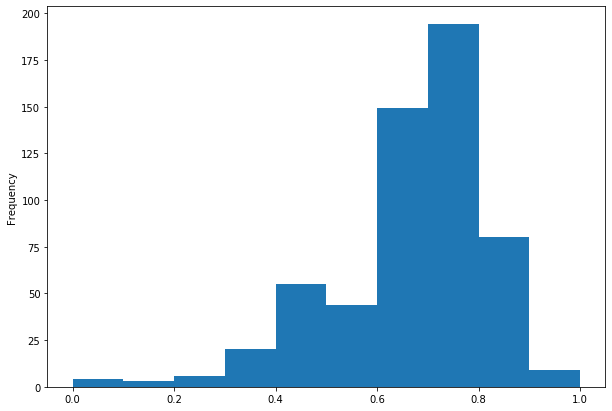

In [43]:
df['Rating'].plot.hist()

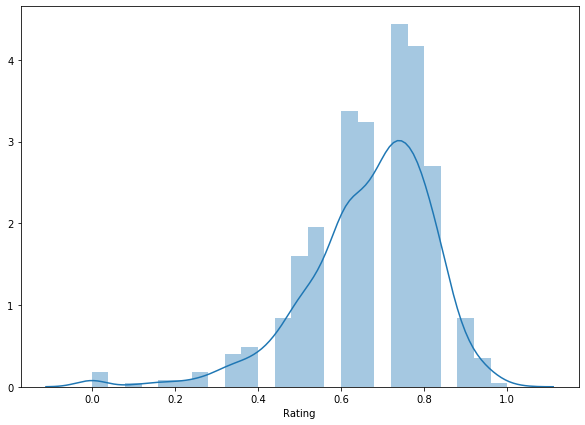

In [44]:
import numpy as np
import seaborn as sns

sns.distplot(df['Rating'])

In [ ]:
df['Reviews'].plot.bar()

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

In [ ]:
qqplot(df['Genres'],line='s')

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Category'],facecolor='orangered',edgecolor='blue')
plt.xlim=(0,25)
plt.show()


In [ ]:
plt.pie(df['Type'],
labels=df['Type'])
plt.show()

In [ ]:
#HYPOTHESIS TESTING
from scipy.stats import ttest_1samp
from scipy import stats
from statsmodels.stats import weightstats as stests



In [ ]:
#DEFINING A USER DEFINED FUNCTION
def barplotAnalysis(x,y):
    
    plt.figure(figsize=(10,8))
    plt.xticks(rotation=90)
    #plotting
    sns.barplot(x,y,palette="CMRmap")

In [ ]:
barplotAnalysis(df['Rating'],df['Installs'])

In [62]:
#does Installs depend on Rating
#NULL HYPOTHESIS:Installs does not depend on Rating
#ALTERNATE HYPOTEHSIS:Installs depends on Rating
Installs_mean = df['Installs'].mean()
Rating_mean = df['Rating'].mean()
print("Installs mean value:",Installs_mean)
print("Size mean value:",Rating_mean )
Installs_std =df['Installs'].std()
Rating_std =df['Rating'].std()
print("Installs std value:",Installs_std)
print("Rating std value:",Rating_std)
ztest ,pval = stests.ztest(df['Rating'],df['Installs'])
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Installs mean value: 0.04657151003243147
Size mean value: 0.6682427107959015
Installs std value: 0.15185069011509794
Rating std value: 0.15183940610318095
0.0
reject null hypothesis


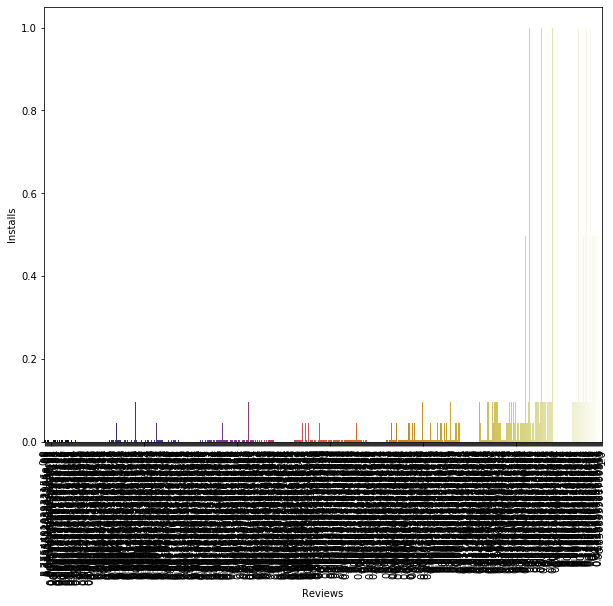

In [63]:
barplotAnalysis(df['Reviews'],df['Installs'])

In [64]:
#does installs depend on size
#NULL HYPOTHESIS:Installs does not depend on Reviews
#ALTERNATE HYPOTEHSIS:Installs depends on Reviews
Installs_mean = df['Installs'].mean()
Reviews_mean = df['Reviews'].mean()
print("Installs mean value:",Installs_mean)
print("Size mean value:",Reviews_mean )
Installs_std =df['Installs'].std()
Reviews_std =df['Reviews'].std()
print("Installs std value:",Installs_std)
print("Rating std value:",Reviews_std)
ztest ,pval = stests.ztest(df['Reviews'],df['Installs'])
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Installs mean value: 0.04657151003243147
Size mean value: 0.020843648159154265
Installs std value: 0.15185069011509794
Rating std value: 0.07287406611648171
0.00028606948904977725
reject null hypothesis


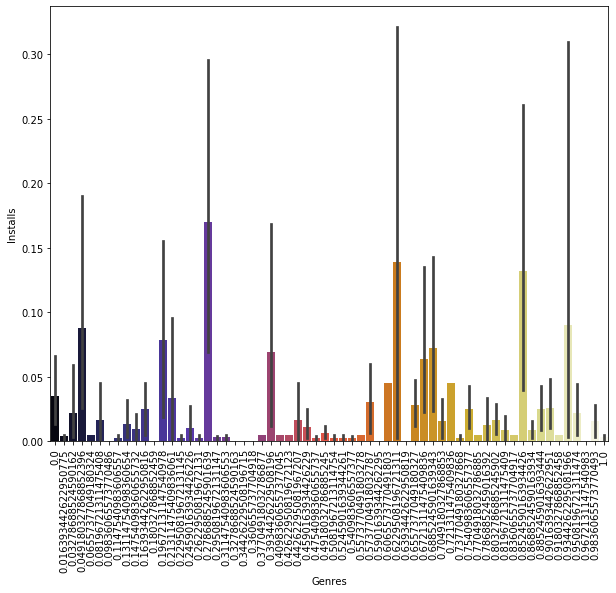

In [65]:
barplotAnalysis(df['Genres'],df['Installs'])

In [66]:
#does installs depend on Genres
#NULL HYPOTHESIS:Installs does not depend on Genres
#ALTERNATE HYPOTEHSIS:Installs depends on Genres
Installs_mean = df['Installs'].mean()
Genres_mean = df['Genres'].mean()
print("Installs mean value:",Installs_mean)
print("Genres mean value:",Genres_mean )
Installs_std =df['Installs'].std()
Genres_std =df['Genres'].std()
print("Installs std value:",Installs_std)
print("Genres std value:",Genres_std)
ztest ,pval = stests.ztest(df['Genres'],df['Installs'])
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Installs mean value: 0.04657151003243147
Genres mean value: 0.5531914893617024
Installs std value: 0.15185069011509794
Genres std value: 0.3085237491461257
3.32631848857648e-268
reject null hypothesis
